## Filter feature selection


##  PCC and CART

## نلاحظ ان أفضل دقة تم الحصول عليها عند تدريب النموذج علي أفضل 18 سمة كانت %89 

##  Age,CEA,CA15,RBC,WBC,ESR,PLT,ALB,FBS,LDH,Creatinin,GPT,GOT,Urea,ALP,Na,CL

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import warnings

In [2]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

Feature - Cat, Target - Cat ==> Chi-Square

Feature - Numeric, Target - Numeric ==> Correlation

Feature - Cat, Target - Numeric ==> f_regression

Feature - Numeric, Target - Cat ==> f_classification


## Befoure missing values

In [3]:
BC = pd.read_csv('bc_with_mis_90.csv')
BC.shape

(2437, 23)

In [4]:
## دتاة لأيجاد الدقة

In [5]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['CLASS'],name='Actual')))
    return 1

In [6]:
BC.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,124.0,69.12,8.02,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,133.0,51.82,7.91,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,155.0,50.00,8.74,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,NaN,40.11,10.34,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,125.0,67.63,7.31,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


In [8]:
categorical_feature_columns = list(set(BC.columns) - set(BC._get_numeric_data().columns))
categorical_feature_columns

[]

In [9]:
numerical_feature_columns = list(BC._get_numeric_data().columns)
numerical_feature_columns

['Sex',
 'Age',
 'Adress',
 'FBS',
 'Urea',
 'Creatinin',
 'ALB',
 'TCa',
 'GPT',
 'GOT',
 'ALP',
 'CA15',
 'CEA',
 'WBC',
 'RBC',
 'HGB',
 'PLT',
 'ESR',
 'LDH',
 'Na',
 'K',
 'CL',
 'CLASS']

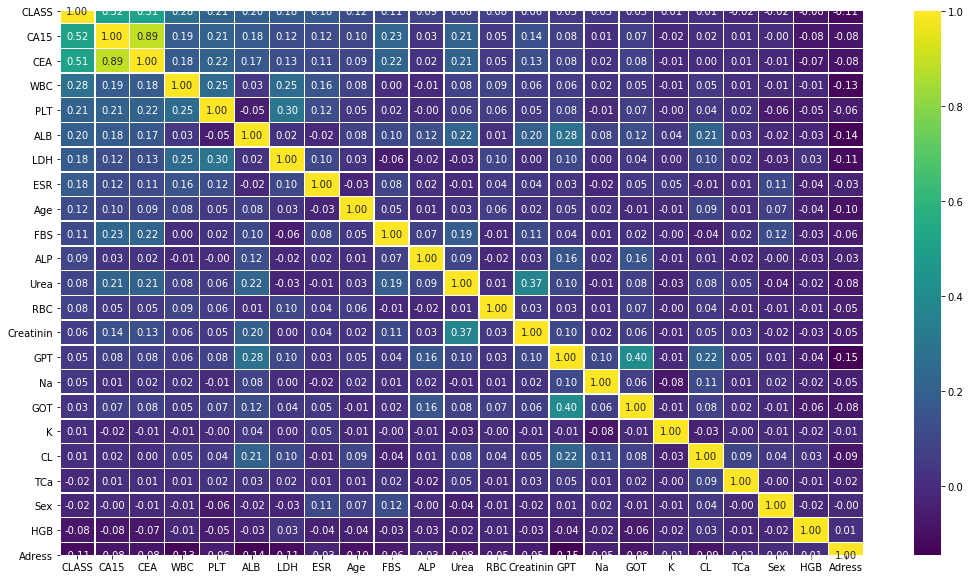

In [11]:
target = 'CLASS'
k = 23 #number of variables for heatmap
cols = BC[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = BC[cols].corr()
f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(cm, annot=True, cmap = 'viridis',linewidths=.5, fmt= '.2f',ax=ax)

## outlires by Z-score


In [12]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())



In [13]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [14]:
BC.isnull().sum()

Sex                    0
Age                    0
Adress                 0
FBS                  389
Urea                 162
Creatinin            155
ALB                  289
TCa                  295
GPT                  297
GOT                  235
ALP                  311
CA15                   2
CEA                    2
WBC                  104
RBC                   68
HGB                  100
PLT                  179
ESR                  388
LDH                  385
Na                   426
K                    398
CL                   662
CLASS                  0
ZScore_FBS           389
ZScore_Urea          162
ZScore_creatinine    155
ZScore_ALB           289
ZScore_TCa           295
ZScore_GPT           297
ZScore_GOT           235
ZScore_ALP           311
ZScore_CA15            2
ZScore_CEA             2
ZScore_WBC           104
ZScore_RBC            68
ZScore_HGB           100
ZScore_PLT           179
ZScore_ESR           388
ZScore_LDH           385
ZScore_Na            426


In [15]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan

BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


In [16]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()


Sex            0
Age            0
Adress         0
FBS          431
Urea         222
Creatinin    179
ALB          339
TCa          303
GPT          354
GOT          276
ALP          335
CA15           5
CEA            3
WBC          117
RBC           72
HGB          103
PLT          182
ESR          406
LDH          395
Na           427
K            406
CL           663
CLASS          0
dtype: int64

In [17]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,24,200.000000,23.0,0.8,3.400000,1.0,2.00000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,19,400.000000,22.0,0.7,4.227464,9.6,3.00000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,282.777273,15.0,260.0,137.8,4.18,19.1,0
2,1,50,19,154.123131,27.0,0.6,3.500000,9.3,11.00000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,17,300.000000,15.0,1.1,4.200000,8.5,13.00000,1.0,136.433273,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,17,345.000000,2.0,1.0,3.000000,8.0,7.00000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,4,70.000000,28.0,0.7,5.900000,9.5,13.72771,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,19,98.000000,32.0,0.8,10.200000,8.8,13.72771,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,19,76.000000,15.0,0.6,11.400000,8.1,22.00000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,19,120.000000,29.0,0.9,10.900000,8.2,51.00000,17.0,104.000000,30.887808,4.529712,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


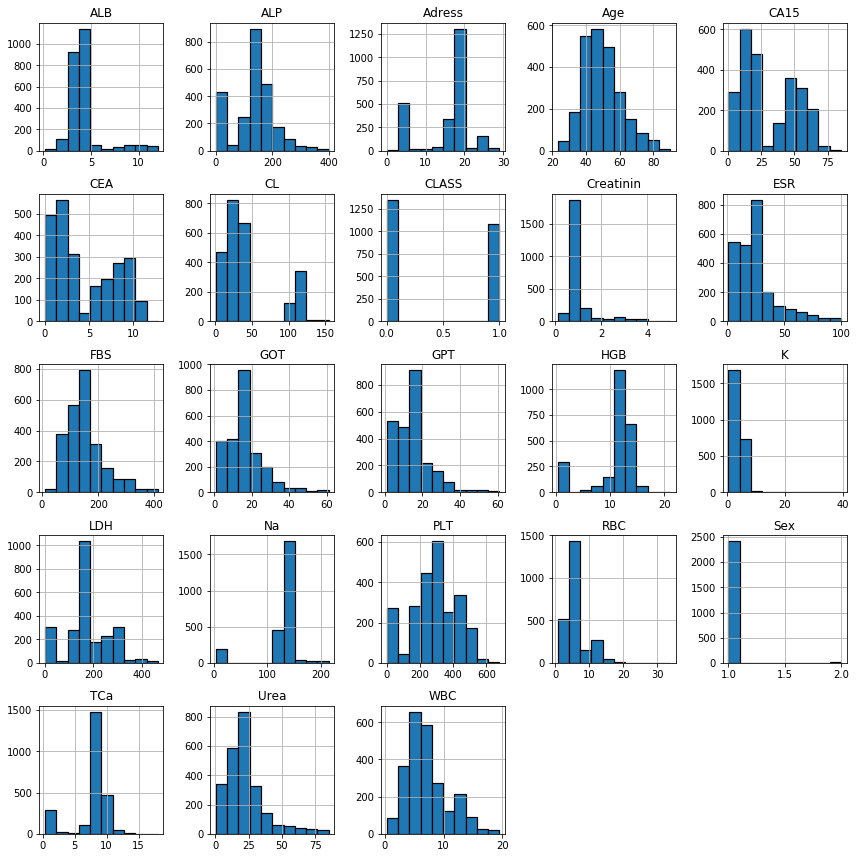

In [18]:
#Distributions values of all Features
BC.hist(figsize=(12,12), edgecolor='black', linewidth=1.2)
plt.tight_layout( True )
plt.show()

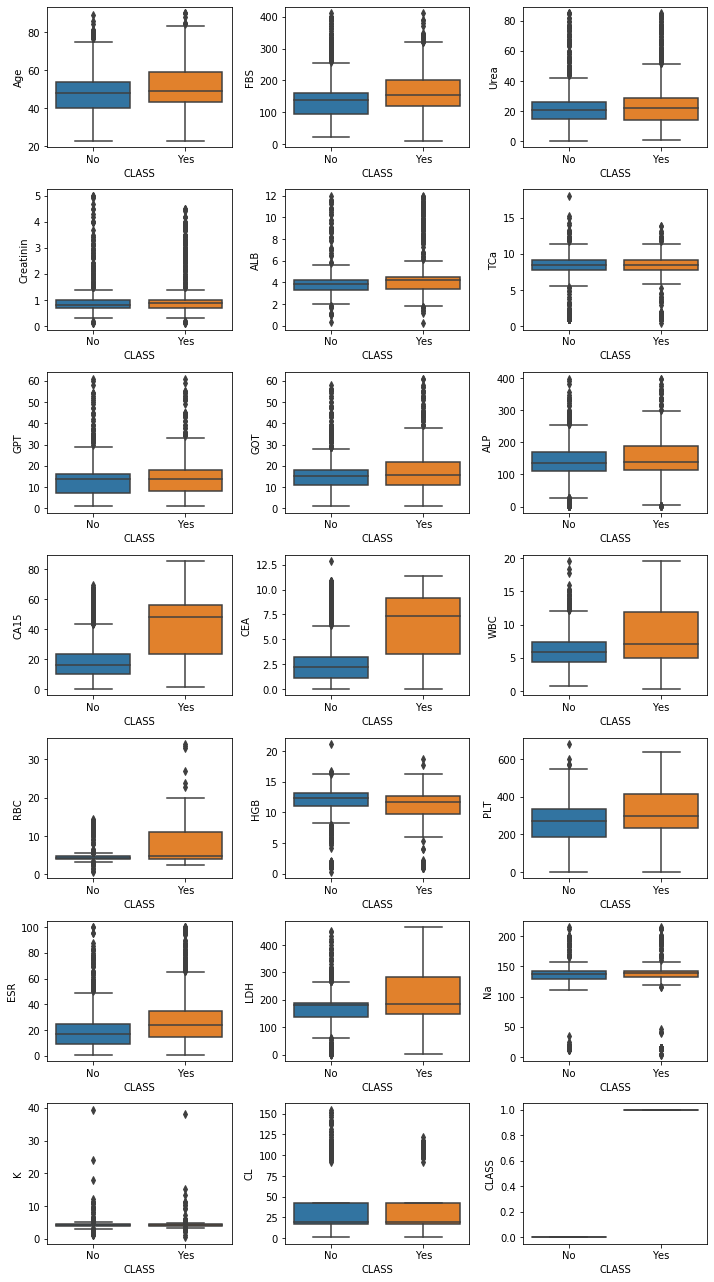

In [19]:
temp = BC[['Age','FBS','Urea','Creatinin','ALB','TCa','GPT','GOT','ALP','CA15','CEA',
                'WBC','RBC','HGB','PLT','ESR','LDH','Na','K','CL','CLASS']]
plt.figure(figsize=(10,20))
for i in range(21):
    plt.subplot(8,3,i+1)# لان عدد الخصائص المطلوبه 24 عنصر نقسمها
    plt.grid( False )
    sns.boxplot(x='CLASS', y=temp.columns[ i ], data=temp)
    plt.xticks([0,1],['No','Yes'], rotation=0 )
plt.tight_layout( True )
plt.show()

###  PCC

In [18]:
##  معرفة أهم 15 سمة لها علاقة الهدف قبل معالجة القيم المفقودة

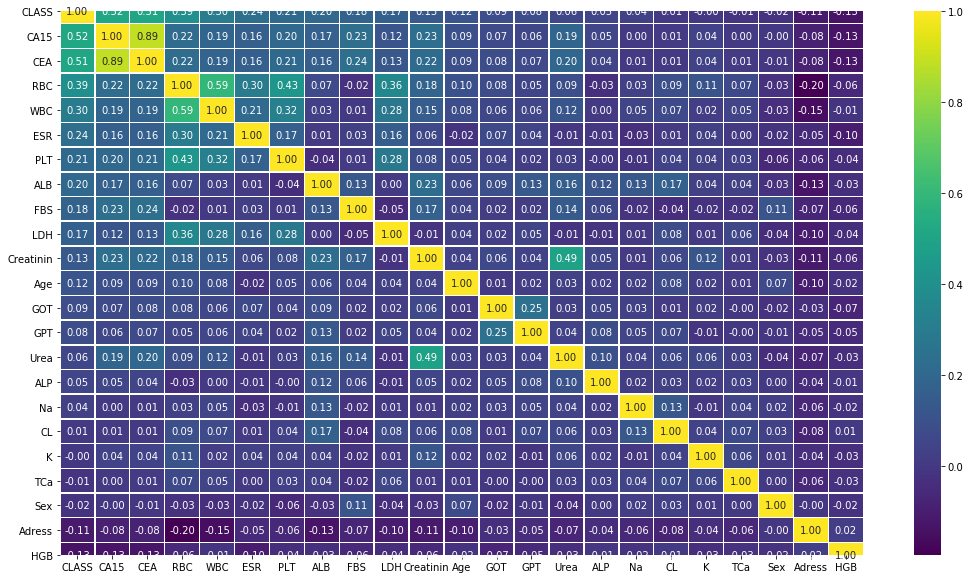

In [20]:

k = 23 #number of variables for heatmap
cols = BC[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = BC[cols].corr()
f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(cm, annot=True, cmap = 'viridis',linewidths=.5, fmt= '.2f',ax=ax)

## After missing values

In [22]:
BC.isnull().sum()

Sex          0
Age          0
Adress       0
FBS          0
Urea         0
Creatinin    0
ALB          0
TCa          0
GPT          0
GOT          0
ALP          0
CA15         0
CEA          0
WBC          0
RBC          0
HGB          0
PLT          0
ESR          0
LDH          0
Na           0
K            0
CL           0
CLASS        0
dtype: int64

In [23]:
##   معرفة أهم 22 سمة لها علاقة الهدف بعد معالجة القيم المفقودة

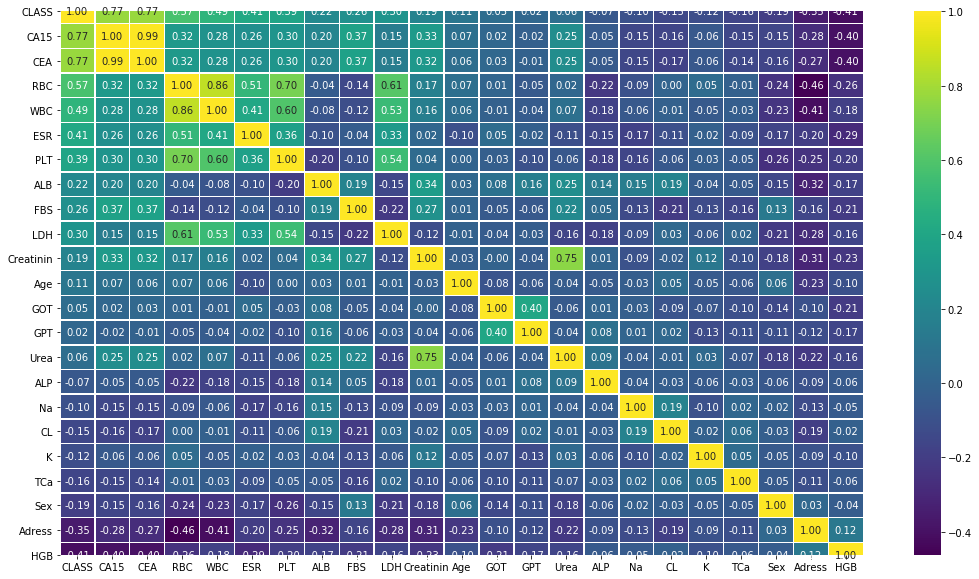

In [24]:

k = 23 #number of variables for heatmap
cols = BC[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = BC[cols].corr()
f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(cm.corr(), annot=True,cmap = 'viridis', linewidths=.5, fmt= '.2f',ax=ax)

In [24]:
X=BC.drop(["CLASS"],axis=1)
Y=BC["CLASS"] 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

In [26]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))


1

In [28]:
corr_features

{'CEA'}

In [29]:
x_train=x_train.drop(corr_features,axis=1)

In [30]:
x_test=x_test.drop(corr_features,axis=1)

## تدريب النموذج  بعد معالجة القيم المفقودة

In [31]:
x_train.shape

(1827, 21)

In [32]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [33]:
D_classifier.score(x_train,y_train)

1.0

In [34]:
from sklearn.metrics import accuracy_score

y_pred_test = D_classifier.predict(x_test)

test_acc =accuracy_score(y_test, y_pred_test)
test_acc


0.8852459016393442

In [35]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8852459016393442

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)

mean_absolute_error is = 0.11475409836065574
mean_squared_error is = 0.3387537429470791


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8852459016393442
[[317  34]
 [ 36 223]]


Text(33.0, 0.5, 'Acutl')

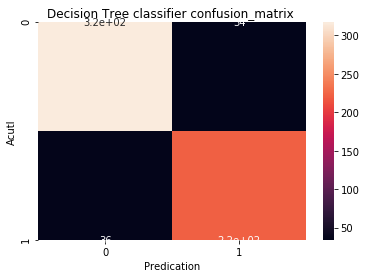

In [37]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [38]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred_test)) 
print("accuracy_score=",accuracy_score(y_test,y_pred_test)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       351
           1       0.87      0.86      0.86       259

    accuracy                           0.89       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.89      0.89      0.89       610

accuracy_score= 0.8852459016393442


## تدريب النموذج علي أفضل 2 سمة بعد معالجة القيم المفقودة


In [39]:

X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","WBC","RBC","PLT","ESR","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [40]:
X.shape

(2437, 2)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

In [42]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [43]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.5819672131147541

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)

mean_absolute_error is = 0.48032786885245904
mean_squared_error is = 0.693056901597884


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.9146141215106732
Decision Tree classifier Testing Accurcy =  0.5819672131147541
[[202 136]
 [119 153]]


Text(33.0, 0.5, 'Acutl')

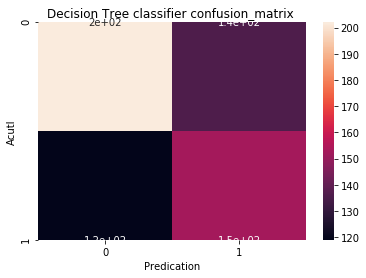

In [45]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [46]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       338
           1       0.54      0.50      0.52       272

    accuracy                           0.59       610
   macro avg       0.58      0.58      0.58       610
weighted avg       0.58      0.59      0.58       610

accuracy_score= 0.5868852459016394


## تدريب النموذج علي أفضل 3 سمة بعد معالجة القيم المفقودة


In [47]:

X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","WBC","PLT","ESR","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [48]:
X.shape


(2437, 3)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

In [50]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [51]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

In [52]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.760655737704918

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.44754098360655736
mean_squared_error is = 0.6689850398974235


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.9989053092501369
Decision Tree classifier Testing Accurcy =  0.760655737704918
[[273  75]
 [ 71 191]]


Text(33.0, 0.5, 'Acutl')

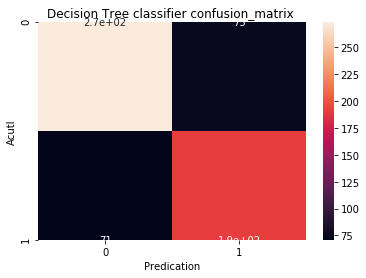

In [54]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [55]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       348
           1       0.72      0.73      0.72       262

    accuracy                           0.76       610
   macro avg       0.76      0.76      0.76       610
weighted avg       0.76      0.76      0.76       610

accuracy_score= 0.760655737704918


## تدريب النموذج علي أفضل 4 سمة بعد معالجة القيم المفقودة


In [56]:
X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","PLT","ESR","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape

(2437, 4)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [58]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [59]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [60]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7295081967213115

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.49836065573770494
mean_squared_error is = 0.7059466380242241


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7295081967213115
[[238  85]
 [ 80 207]]


Text(33.0, 0.5, 'Acutl')

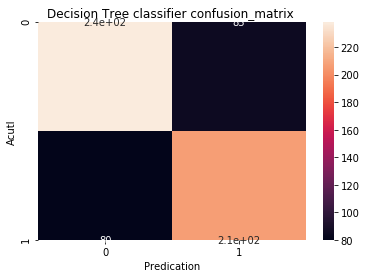

In [62]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [63]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       323
           1       0.71      0.72      0.72       287

    accuracy                           0.73       610
   macro avg       0.73      0.73      0.73       610
weighted avg       0.73      0.73      0.73       610

accuracy_score= 0.7295081967213115


## تدريب النموذج علي أفضل 5 سمة بعد معالجة القيم المفقودة


In [64]:
X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","PLT","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 
X.shape

(2437, 5)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [66]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [67]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [68]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7524590163934426

In [69]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.4672131147540984
mean_squared_error is = 0.6835298930947339


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7524590163934426
[[249  61]
 [ 90 210]]


Text(33.0, 0.5, 'Acutl')

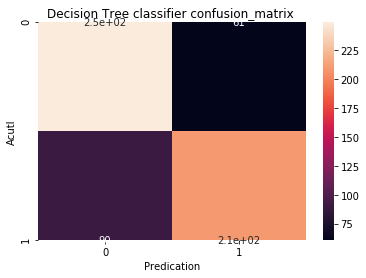

In [70]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [71]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       310
           1       0.77      0.70      0.74       300

    accuracy                           0.75       610
   macro avg       0.75      0.75      0.75       610
weighted avg       0.75      0.75      0.75       610

accuracy_score= 0.7524590163934426


## تدريب النموذج علي أفضل 6 سمة بعد معالجة القيم المفقودة



In [72]:
X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 6)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [74]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [75]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [76]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.7754098360655738

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.5114754098360655
mean_squared_error is = 0.7151750903352727


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7754098360655738
[[275  64]
 [ 73 198]]


Text(33.0, 0.5, 'Acutl')

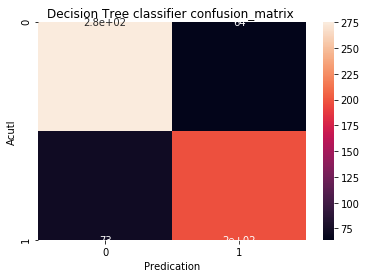

In [78]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [79]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       339
           1       0.76      0.73      0.74       271

    accuracy                           0.78       610
   macro avg       0.77      0.77      0.77       610
weighted avg       0.77      0.78      0.77       610

accuracy_score= 0.7754098360655738


## تدريب النموذج علي أفضل 7 سمة بعد معالجة القيم المفقودة


In [80]:
X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","TCa","GPT","GOT","ALP","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 7)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [82]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [83]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [84]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8245901639344262

In [85]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.5163934426229508
mean_squared_error is = 0.7186052063706126


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8245901639344262
[[292  38]
 [ 69 211]]


Text(33.0, 0.5, 'Acutl')

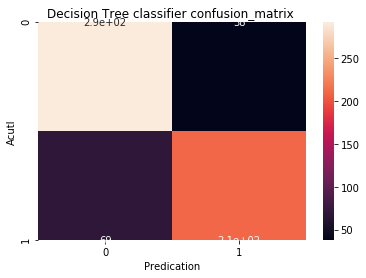

In [86]:

from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [87]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       330
           1       0.85      0.75      0.80       280

    accuracy                           0.82       610
   macro avg       0.83      0.82      0.82       610
weighted avg       0.83      0.82      0.82       610

accuracy_score= 0.8245901639344262


## تدريب النموذج علي أفضل8 سمة بعد معالجة القيم المفقودة


In [88]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","TCa","GPT","GOT","ALP","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 
X.shape

(2437, 8)

In [89]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [90]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [91]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [92]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8737704918032787

In [93]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.5278688524590164
mean_squared_error is = 0.7265458364473754


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8737704918032787
[[313  36]
 [ 41 220]]


Text(33.0, 0.5, 'Acutl')

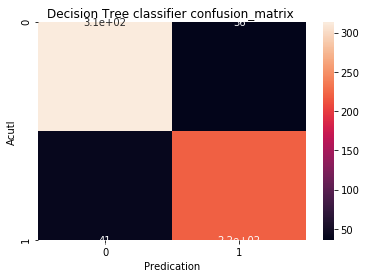

In [94]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [95]:
## CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       349
           1       0.86      0.84      0.85       261

    accuracy                           0.87       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8737704918032787


## تدريب النموذج علي أفضل9  سمة بعد معالجة القيم المفقودة


In [96]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","TCa","GPT","GOT","ALP","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 9)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [98]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [99]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [100]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8704918032786885

In [101]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.5032786885245901
mean_squared_error is = 0.7094213758582343


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8704918032786885
[[294  44]
 [ 35 237]]


Text(33.0, 0.5, 'Acutl')

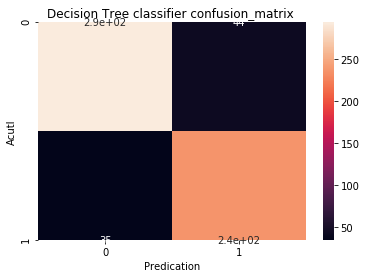

In [102]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [103]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       338
           1       0.84      0.87      0.86       272

    accuracy                           0.87       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8704918032786885


## تدريب النموذج علي أفضل10  سمة بعد معالجة القيم المفقودة


In [104]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","TCa","GPT","GOT","ALP","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 10)

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [106]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [107]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [108]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8655737704918033

In [109]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.5
mean_squared_error is = 0.7071067811865476


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8655737704918033
[[308  36]
 [ 46 220]]


Text(33.0, 0.5, 'Acutl')

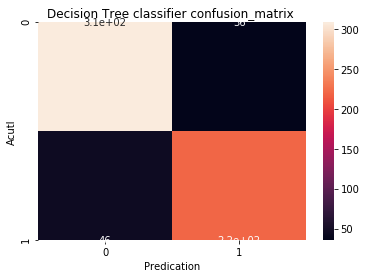

In [110]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [111]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       344
           1       0.86      0.83      0.84       266

    accuracy                           0.87       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8655737704918033


## تدريب النموذج علي أفضل11 سمة بعد معالجة القيم المفقودة


In [112]:
X=BC.drop(["CLASS","Sex","Adress","Urea","TCa","GPT","GOT","ALP","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 
X.shape



(2437, 11)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [114]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [115]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [116]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8573770491803279

In [117]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.48360655737704916
mean_squared_error is = 0.6954182607446033


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8573770491803279
[[300  40]
 [ 47 223]]


Text(33.0, 0.5, 'Acutl')

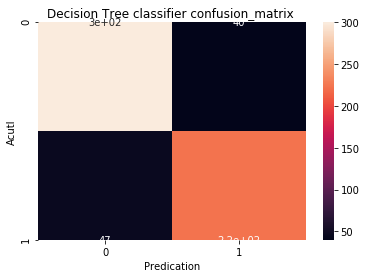

In [118]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [119]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       340
           1       0.85      0.83      0.84       270

    accuracy                           0.86       610
   macro avg       0.86      0.85      0.86       610
weighted avg       0.86      0.86      0.86       610

accuracy_score= 0.8573770491803279


## تدريب النموذج علي أفضل12 سمة بعد معالجة القيم المفقودة


In [120]:
X=BC.drop(["CLASS","Sex","Adress","Urea","TCa","GPT","ALP","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 
X.shape

(2437, 12)

In [121]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [122]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [123]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [124]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8475409836065574

In [125]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.460655737704918
mean_squared_error is = 0.6787162424054091


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8475409836065574
[[285  43]
 [ 50 232]]


Text(33.0, 0.5, 'Acutl')

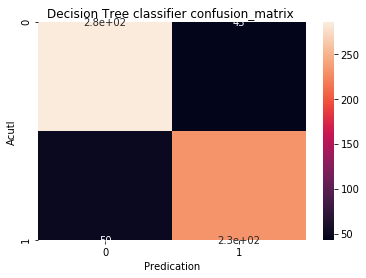

In [126]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [127]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       328
           1       0.84      0.82      0.83       282

    accuracy                           0.85       610
   macro avg       0.85      0.85      0.85       610
weighted avg       0.85      0.85      0.85       610

accuracy_score= 0.8475409836065574


## تدريب النموذج علي أفضل 13  سمة بعد معالجة القيم المفقودة



In [128]:

X=BC.drop(["CLASS","Sex","Adress","Urea","TCa","ALP","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 

X.shape

(2437, 13)

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [130]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [131]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [132]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8540983606557377

In [133]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.4672131147540984
mean_squared_error is = 0.6835298930947339


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8540983606557377
[[304  40]
 [ 49 217]]


Text(33.0, 0.5, 'Acutl')

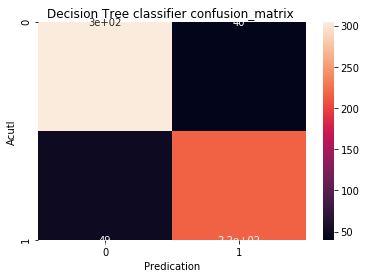

In [134]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

      

In [135]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       344
           1       0.84      0.82      0.83       266

    accuracy                           0.85       610
   macro avg       0.85      0.85      0.85       610
weighted avg       0.85      0.85      0.85       610

accuracy_score= 0.8540983606557377


## تدريب النموذج علي أفضل 14  سمة بعد معالجة القيم المفقودة


In [136]:
X=BC.drop(["CLASS","Sex","Adress","TCa","ALP","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 14)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [138]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [139]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [140]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8573770491803279

In [141]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.48688524590163934
mean_squared_error is = 0.697771628759467


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8573770491803279
[[288  44]
 [ 43 235]]


Text(33.0, 0.5, 'Acutl')

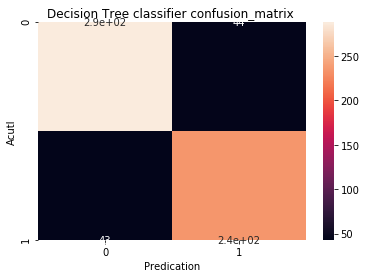

In [142]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [143]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       332
           1       0.84      0.85      0.84       278

    accuracy                           0.86       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.86      0.86      0.86       610

accuracy_score= 0.8573770491803279


## تدريب النموذج علي أفضل 15  سمة بعد معالجة القيم المفقودة


In [144]:
X=BC.drop(["CLASS","Sex","Adress","TCa","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 15)

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [146]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [147]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [148]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8688524590163934

In [149]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.519672131147541
mean_squared_error is = 0.7208828831006746


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8688524590163934
[[300  34]
 [ 46 230]]


Text(33.0, 0.5, 'Acutl')

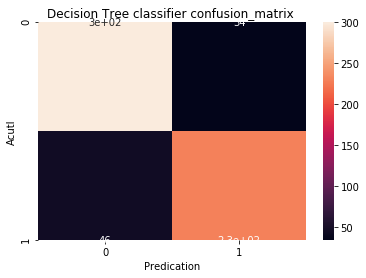

In [150]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [151]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       334
           1       0.87      0.83      0.85       276

    accuracy                           0.87       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8688524590163934


## تدريب النموذج علي أفضل 16  سمة بعد معالجة القيم المفقودة


In [152]:
X=BC.drop(["CLASS","Sex","Adress","TCa","K","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 16)

In [153]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [154]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [155]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [156]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8786885245901639

In [157]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.4459016393442623
mean_squared_error is = 0.6677586684905426


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8786885245901639
[[297  42]
 [ 32 239]]


Text(33.0, 0.5, 'Acutl')

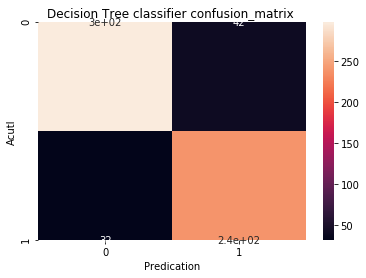

In [158]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [159]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       339
           1       0.85      0.88      0.87       271

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8786885245901639


## تدريب النموذج علي أفضل 17  سمة بعد معالجة القيم المفقودة


In [160]:
X=BC.drop(["CLASS","Sex","Adress","TCa","K","HGB"],axis=1)
Y=BC["CLASS"] 

X.shape


(2437, 17)

In [161]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [162]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [163]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [164]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8868852459016393

In [165]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.4721311475409836
mean_squared_error is = 0.6871180011766419


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8868852459016393
[[317  24]
 [ 45 224]]


Text(33.0, 0.5, 'Acutl')

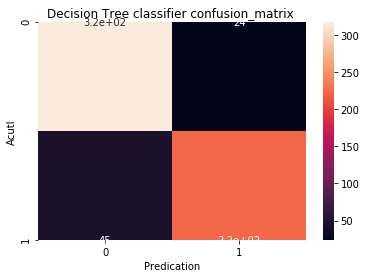

In [166]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [167]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       341
           1       0.90      0.83      0.87       269

    accuracy                           0.89       610
   macro avg       0.89      0.88      0.88       610
weighted avg       0.89      0.89      0.89       610

accuracy_score= 0.8868852459016393


## تدريب النموذج علي أفضل 18  سمة بعد معالجة القيم المفقودة


In [168]:
X=BC.drop(["CLASS","Sex","Adress","TCa","HGB"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 18)

In [169]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [170]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [171]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [172]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8918032786885246

In [173]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.5049180327868853
mean_squared_error is = 0.7105758459073073


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8918032786885246
[[319  34]
 [ 32 225]]


Text(33.0, 0.5, 'Acutl')

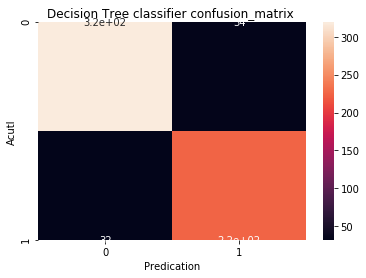

In [174]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [175]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       353
           1       0.87      0.88      0.87       257

    accuracy                           0.89       610
   macro avg       0.89      0.89      0.89       610
weighted avg       0.89      0.89      0.89       610

accuracy_score= 0.8918032786885246


## تدريب النموذج علي أفضل 19  سمة بعد معالجة القيم المفقودة


In [176]:
X=BC.drop(["CLASS","Sex","Adress","HGB"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 19)

In [177]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [178]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [179]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [180]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8754098360655738

In [181]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.5081967213114754
mean_squared_error is = 0.7128791772183246


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8754098360655738
[[305  32]
 [ 44 229]]


Text(33.0, 0.5, 'Acutl')

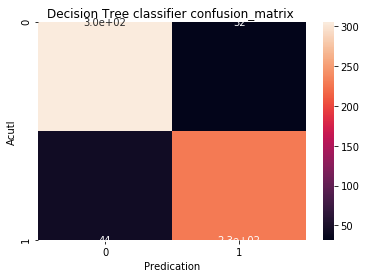

In [182]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [183]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       337
           1       0.88      0.84      0.86       273

    accuracy                           0.88       610
   macro avg       0.88      0.87      0.87       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8754098360655738


## تدريب النموذج علي أفضل 20  سمة بعد معالجة القيم المفقودة


In [184]:
X=BC.drop(["CLASS","Adress","HGB"],axis=1)
Y=BC["CLASS"] 
X.shape



(2437, 20)

In [185]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [186]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [187]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [188]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8655737704918033

In [189]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.47704918032786886
mean_squared_error is = 0.6906874693577906


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8655737704918033
[[295  43]
 [ 39 233]]


Text(33.0, 0.5, 'Acutl')

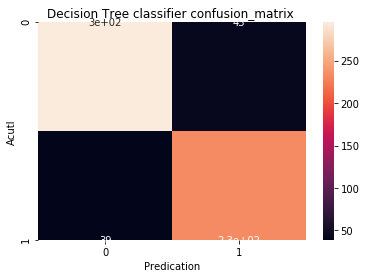

In [190]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [191]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       338
           1       0.84      0.86      0.85       272

    accuracy                           0.87       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8655737704918033


## تدريب النموذج علي أفضل 21  سمة بعد معالجة القيم المفقودة


In [192]:
X=BC.drop(["CLASS","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 21)

In [193]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [194]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [195]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [196]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8754098360655738

In [197]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.4672131147540984
mean_squared_error is = 0.6835298930947339


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8754098360655738
[[310  28]
 [ 48 224]]


Text(33.0, 0.5, 'Acutl')

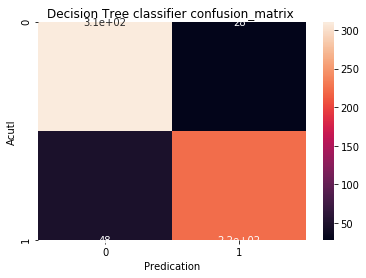

In [198]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [199]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       338
           1       0.89      0.82      0.85       272

    accuracy                           0.88       610
   macro avg       0.88      0.87      0.87       610
weighted avg       0.88      0.88      0.87       610

accuracy_score= 0.8754098360655738


## تدريب النموذج علي أفضل 22  سمة بعد معالجة القيم المفقودة


In [200]:
X=BC.drop(["CLASS"],axis=1)
Y=BC["CLASS"] 

X.shape


(2437, 22)

In [201]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [202]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [203]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [204]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8803278688524591

In [205]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred_test,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred_test,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.4639344262295082
mean_squared_error is = 0.6811273201314921


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8803278688524591
[[304  30]
 [ 43 233]]


Text(33.0, 0.5, 'Acutl')

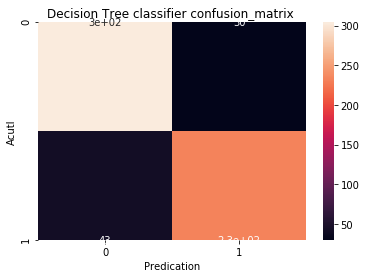

In [206]:

from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [207]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       334
           1       0.89      0.84      0.86       276

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8803278688524591


In [211]:
No_best_Fs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
validation_accuracy = [58,
                       76,
                       72,
                       75,
                       77,
                       82,
                       87,
                       87,
                       86,
                       85,
                       84,
                       85,
                       85,
                       86,
                       87,
                       88,
                       89,
                       87,
                       86,
                       87,
                       88]
List = zip(No_best_Fs,validation_accuracy)
df = pd.DataFrame(data = List, columns=['No_best_Fs','validation_accuracy'],)
df


,No_best_Fs,validation_accuracy
0,2,58
1,3,76
2,4,72
3,5,75
4,6,77
5,7,82
6,8,87
7,9,87
8,10,86
9,11,85


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bst'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


the best fretures number by PCC are 18:
Age,CEA,CA15,RBC,WBC,ESR,PLT,ALB,FBS,LDH,Creatinin,GPT,GOT,Urea,ALP,Na,CL,K


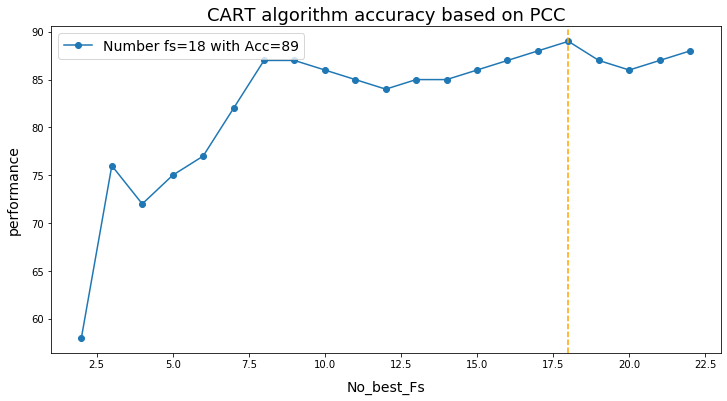

In [212]:
plt.figure(figsize=(12,6))
plt.plot(df['No_best_Fs'],df['validation_accuracy'],label='Number fs=18 with Acc=89',marker='o')

plt.title("CART algorithm accuracy based on PCC",fontsize=18)
plt.axvline(x=18, color='orange', linestyle='--')
plt.xlabel('No_best_Fs',labelpad=10, fontsize=14)
plt.ylabel('performance',labelpad=10, fontsize=14)
plt.legend(bbox_to_anchor=(1,1),fontsize=14)
plt.legend(loc='bst',fontsize=14)

print("the best fretures number by PCC are 18:")
print("Age,CEA,CA15,RBC,WBC,ESR,PLT,ALB,FBS,LDH,Creatinin,GPT,GOT,Urea,ALP,Na,CL,K")
plt.show()